In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Activation, Bidirectional
import tensorflow as tf

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
datasetset = pd.read_csv("./datasets/30balls/5to30balls.csv", header=None)
datasetset = datasetset.fillna(0)
datasetset = np.array(datasetset)
datasetset.shape

(104000, 91)

In [4]:
x_train = datasetset[:,1:]
x_train.shape

(104000, 90)

In [5]:
row = int(x_train.shape[1]/3)
col = 3

In [6]:
x_train = x_train.reshape(x_train.shape[0], row, col)
x_train = x_train.astype('float32')
x_train.shape

(104000, 30, 3)

In [7]:
x_train = x_train.reshape(x_train.shape[0], row, col)
x_train = x_train.astype('float32')
x_train.shape

(104000, 30, 3)

In [8]:
y_train = datasetset[:,0]
y_train = y_train.astype('int')
y_train.shape

(104000,)

In [9]:
n_classes = 8

In [10]:
y_train = np_utils.to_categorical(y_train, n_classes)
y_train.shape

(104000, 8)

In [11]:
model = Sequential()
model.add(CuDNNLSTM(units=256, input_shape=(row,col), return_sequences=True))
#model.add(LSTM(units=256, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=128, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=64, activation='tanh', unroll=True, return_sequences=True, dropout=0.2))
model.add(CuDNNLSTM(units=128, return_sequences=True))
model.add(CuDNNLSTM(units=64, return_sequences=True))
model.add(CuDNNLSTM(units=32, return_sequences=True))
model.add(CuDNNLSTM(units=16, return_sequences=True))
model.add(CuDNNLSTM(units=8))
model.add(Dense(units=n_classes, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 30, 256)           267264    
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 30, 128)           197632    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 30, 64)            49664     
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 30, 32)            12544     
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 30, 16)            3200      
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 8)                 832       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
Total para

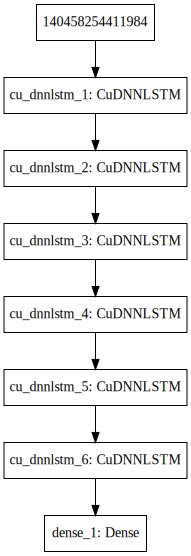

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [64]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
# training
batch_size = 2000
training_iters = 100
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_iters, shuffle=True)

Epoch 1/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0033 - acc: 0.9990
Epoch 2/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0027 - acc: 0.9993
Epoch 3/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0032 - acc: 0.9991
Epoch 4/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0026 - acc: 0.9992
Epoch 5/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0027 - acc: 0.9992
Epoch 6/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0031 - acc: 0.9991
Epoch 7/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0032 - acc: 0.9988
Epoch 8/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0017 - acc: 0.9995
Epoch 9/100
104000/104000 [==============================] - 3s 26us/step - loss: 0.0028 - acc: 0.9990
Epoch 10/100
104000/104000 [==============================] - 3s 26us/ste

In [66]:
def cal_acc(direction, speed):
    #num1 = num
    #num = int(num)
    speed = str(speed)
    file = './datasets/30balls/' +  direction + speed + '_test.csv'
    #file = './datasets/top5_test.csv'
    test_up2 = pd.read_csv(file, header=None)
    test_up2 = test_up2.fillna(0)
    test_up2 = np.array(test_up2)
    #test_up2 = test_up2[:,:30]
    #print(test_up2.shape)
    test_up2 = test_up2.reshape(test_up2.shape[0],row,col)
    cnt = np.array([0,0,0,0,0,0,0,0])
    pred = model.predict(test_up2)
    for i in range (pred.shape[0]):
        for j in range (8):
            if max(pred[i,:]) == pred[i,j]:
                cnt[j] += 1
            #else:
                #print(i)
        #print("i = ",i+1)
        #print("\n",cnt)
    #print('------------------------------')
    return cnt

In [71]:
accuarcy = np.zeros([8,8])
accuarcy[0,:] = cal_acc('top', 5)
accuarcy[1,:] = cal_acc('top', 6)
accuarcy[2,:] = cal_acc('left', 5)
accuarcy[3,:] = cal_acc('left', 6)
accuarcy[4,:] = cal_acc('right', 5)
accuarcy[5,:] = cal_acc('right', 6)
accuarcy[6,:] = cal_acc('back', 5)
accuarcy[7,:] = cal_acc('back', 6)
accuarcy

array([[245.,   5.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  2., 248.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 249.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   2., 248.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 250.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2., 248.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 250.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 250.]])

In [76]:
top5_test = pd.read_csv('./datasets/30balls/left5_test.csv', header=None)
top5_test = np.array(top5_test)
top5_test.shape

(250, 90)

In [77]:

np.set_printoptions(suppress=True)
for i in range(14,90,3):
    tmp = top5_test[1,:i]
    tmp = tmp.reshape(1, tmp.shape[0])
    tmp = sequence.pad_sequences(tmp, maxlen=(row*col), padding='post', dtype='float32')
    tmp = tmp.reshape(1, 30, 3)
    print((i+1)/3)
    preddd = model.predict(tmp, verbose=1)
    print(preddd)
    #print(tmp.shape)

5.0
1/1 [==============================] - 0s 3ms/step
[[0.00000092 0.646371   0.         0.00065867 0.         0.00001674
  0.00000841 0.3529443 ]]
6.0
1/1 [==============================] - 0s 3ms/step
[[0.00000001 0.99913234 0.         0.00085833 0.         0.00000015
  0.00000003 0.00000926]]
7.0
1/1 [==============================] - 0s 3ms/step
[[0.         0.00861369 0.00000016 0.99102986 0.         0.00000013
  0.00000003 0.00035618]]
8.0
1/1 [==============================] - 0s 3ms/step
[[0.         0.00000364 0.00000294 0.9999932  0.         0.
  0.00000001 0.00000015]]
9.0
1/1 [==============================] - 0s 4ms/step
[[0.         0.00000045 0.0000411  0.9999583  0.00000002 0.
  0.         0.00000003]]
10.0
1/1 [==============================] - 0s 3ms/step
[[0.00000007 0.00000076 0.00114765 0.9988512  0.00000024 0.
  0.00000001 0.00000013]]
11.0
1/1 [==============================] - 0s 3ms/step
[[0.00000984 0.00000074 0.7420448  0.25794074 0.00000221 0.
  0.00000038 

In [73]:
#model.save('./classification_30ball_20200505_256to8')